 # Gathering Data

In [894]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import requests
import os
import re
%matplotlib inline

In [425]:
# Import twitter archive into it own dataframe
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [426]:
# make a copy of the dataframe for data cleaning purposes
twitter_archive_clean = twitter_archive.copy()

In [427]:
# Saving file url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [428]:
# downlading required file
r = requests.get(url)
open('image_predictions.tsv','wb').write(r.content)

335079

In [429]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [16]:
# Authenticating twitter API
consumer_key = 'rhSeK4uFZBIhh3H2MDZKUD89C'
consumer_secret = 'NignXn57JGH6gcmwkrNASk27nOu9Y0bScIOqJbJk6ZGy0J2If3'
access_token = '1298649599201214465-EptlsXIumZRFSZfLKqXSYtQZo9yQJ3'
access_secret = 'XRDkZWbibkOAxKwSt3GWtzguXtbZX6wYr12LEpHQRCQss'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth)

In [17]:
# Getting each tweet data using the tweet's ID and storing it in a text file
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive_clean.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
        except tweepy.TweepError :
            continue
        else:
            json.dump(tweet._json, file)
            file.write('\n')

In [129]:
# Construct a dataframe using tweets_list
tweets_data = pd.DataFrame(tweets_list, columns=['tweet_id', 'favorite_count', 'retweet_count'])

In [133]:
tweets_data_clean = tweets_data.copy()

In [135]:
tweets_data.to_csv('tweets_data.csv')

# Assessing Data

In [358]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [359]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [360]:
twitter_archive_clean.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

 
#### Quality issues
- Retweets included in database
- Replies included in database
- tweets with no images inclueded in database
- ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp', 'expanded_urls'] columns, not needed for analysis.
- ['p1, p1_conf', 'p1_dog', 'p2, p2_conf', 'p2_dog', 'p3, p3_conf', 'p3_dog', 'img_num'] not needed for analysis
- ['timestamp'] column has extra characters.
- ['source'] column does not state the tweet's source clearly.
- ['name'] column has wrong values.
- ['tweet_id'] column data type is int64 should be str.
- ['timestamp'] columns data type is str, should be datetime.
- ['dog_type'] should have category data type.
- ['source'] sould have category data type.
- ['rating_numerator'] and ['rating_denominator'] column has some wrong values.
- ['dog_breed'] values are in different forms

#### Tidiness Issues
- image_predictions, tweet_data and twitter archive should be one table
- ['doggo', 'floofer', 'pupper', 'puppo']  should be a single variable

### Cleaning

#### Define
##### Quality

- [x] Drop replies.
- [x] Drop retweets.
- [x] Drop tweets with no images.
- [x] Drop ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp', 'expanded_urls'] columns, not needed for analysis.
- [x] ['p1, p1_conf', 'p1_dog', 'p2, p2_conf', 'p2_dog', 'p3, p3_conf', 'p3_dog', 'img_num'] not needed for analysis
- [x] Remove extra '+0000' in timestamp column
- [x] Extract tweet source from 'source' column
- [x] Fix dog names.
- [x] Change tweet_id data type to str.
- [x] Change timestamp' data type to datetime.
- [x] Change 'dog_type' type to category
- [x] Change 'source' type to category
- [x] Fix rating_numerator column with correct rating values.
- [x] Fix rating_denominator column with correct rating values.
- [x] Fix dog breeds to have the same form.



###### Tidiness
- [x] Merge all tables together
- [x] Convert ['doggo', 'floofer', 'pupper', 'puppo'] to a single column
- [x] Extract dog_breed and its confidence 

image_predictions_clean = image_predictions.copy()

In [449]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [450]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [470]:
tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2214
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2215 non-null   int64
 1   favorite_count  2215 non-null   int64
 2   retweet_count   2215 non-null   int64
dtypes: int64(3)
memory usage: 69.2 KB


#### 1- Merge all tables together

In [489]:
# merging tables together
twitter_archive_master = pd.merge(twitter_archive_clean, tweets_data_clean, on=['tweet_id'], how='left')

In [490]:
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean, on=['tweet_id'], how='left')

In [491]:
master_clean = twitter_archive_master.copy()

In [492]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [493]:
master_clean.to_csv("twitter_archive_master.csv")

#### 2- Drop retweets and replies

In [494]:
# drop retweets
master_clean = master_clean[master_clean.retweeted_status_id.isnull()]

In [495]:
# drop replies
master_clean = master_clean[master_clean.in_reply_to_status_id.isnull()]

In [496]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [497]:
# drop retweets and replies related_column
master_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [498]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  favorite_count      1982 non-null   float64
 13  retweet_count       1982 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

In [500]:
pd.set_option('display.max_columns', 25)

In [501]:
master_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,35765.0,7565.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,30897.0,5605.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,23237.0,3715.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,39064.0,7751.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,37309.0,8346.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,96.0,40.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,266.0,129.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2353,666033412701032449,20

#### 3- Drop tweets with no images

In [502]:
master_clean = master_clean[master_clean.jpg_url.notnull()]

In [503]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  favorite_count      1869 non-null   float64
 13  retweet_count       1869 non-null   float64
 14  jpg_url             1971 non-null   object 
 15  img_num             1971 non-null   float64
 16  p1    

#### 4-Convert ['doggo', 'pupper', 'floofer', 'puppo'] into one column

In [511]:
# create a list with column headers
column_headers = master_clean.columns.to_list()
dog_types = ['doggo', 'floofer', 'puppo', 'pupper']

In [512]:
for dog_type in dog_types:
    column_headers.remove(dog_type)

In [524]:
print(f'doggo: { master_clean.doggo.value_counts()[1]} ')
print(f'pupper: { master_clean.pupper.value_counts()[1]} ')
print(f'floofer: { master_clean.floofer.value_counts()[1]} ')
print(f'puppo: { master_clean.puppo.value_counts()[1]} ')

doggo: 73 
pupper: 209 
floofer: 8 
puppo: 23 


In [534]:
master_clean_1 = master_clean.copy()

In [535]:
master_clean_1 = pd.melt(master_clean_1, id_vars=column_headers, value_vars=dog_types, value_name='dog_type')

In [536]:
master_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7884 non-null   int64  
 1   timestamp           7884 non-null   object 
 2   source              7884 non-null   object 
 3   text                7884 non-null   object 
 4   expanded_urls       7884 non-null   object 
 5   rating_numerator    7884 non-null   int64  
 6   rating_denominator  7884 non-null   int64  
 7   name                7884 non-null   object 
 8   favorite_count      7476 non-null   float64
 9   retweet_count       7476 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [537]:
master_clean_1.dog_type.value_counts()

None       7571
pupper     209 
doggo      73  
puppo      23  
floofer    8   
Name: dog_type, dtype: int64

In [541]:
master_clean_1 = master_clean_1.sort_values('dog_type').drop_duplicates('tweet_id', keep='last')

In [547]:
master_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorite_count      1869 non-null   float64
 9   retweet_count       1869 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [544]:
master_clean_1.dog_type.value_counts()

None       1668
pupper     209 
doggo      63  
puppo      23  
floofer    8   
Name: dog_type, dtype: int64

In [551]:
master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [553]:
dog_types_df = master_clean.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'], axis=1)

In [558]:
pd.set_option("display.max_rows",73)

In [560]:
dog_types_df = dog_types_df[dog_types_df.doggo=='doggo']

In [594]:
error_ids =  []
error_ids = error_ids + dog_types_df[dog_types_df.floofer != 'None'].tweet_id.to_list()
error_ids = error_ids + dog_types_df[dog_types_df.pupper != 'None'].tweet_id.to_list()
error_ids = error_ids + dog_types_df[dog_types_df.puppo != 'None'].tweet_id.to_list()

In [603]:
for twt_id in error_ids:
    print(str(twt_id)+': ' + master_clean_1[master_clean_1.tweet_id == twt_id].text)
    print('\n')

2123    854010172552949760: At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object


6250    817777686764523521: This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Name: text, dtype: object


6307    808106460588765185: Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Name: text, dtype: object


6334    801115127852503040: This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
Name: text, dtype: object


6419    785639753186217984: This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pe

In [608]:
for twt_id in error_ids:
    print(master_clean_1[master_clean_1.tweet_id == twt_id ].dog_type)

2123    floofer
Name: dog_type, dtype: object
6250    pupper
Name: dog_type, dtype: object
6307    pupper
Name: dog_type, dtype: object
6334    pupper
Name: dog_type, dtype: object
6419    pupper
Name: dog_type, dtype: object
6561    pupper
Name: dog_type, dtype: object
6613    pupper
Name: dog_type, dtype: object
6702    pupper
Name: dog_type, dtype: object
6748    pupper
Name: dog_type, dtype: object
4088    puppo
Name: dog_type, dtype: object


Change the following dog_types after checking tweet text:

   
    - tweet_id['808106460588765185'] none
    - tweet_id['785639753186217984'] doggo
    - tweet_id['759793422261743616'] none
    - tweet_id['751583847268179968'] none
    - tweet_id['741067306818797568'] none
    - tweet_id['733109485275860992'] none
    - tweet_id['855851453814013952'] puppo

In [619]:
# fixing dog_types column values
master_clean_1.at[master_clean_1.tweet_id == 817777686764523521, 'dog_type'] = 'None'
master_clean_1.at[master_clean_1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
master_clean_1.at[master_clean_1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
master_clean_1.at[master_clean_1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
master_clean_1.at[master_clean_1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
master_clean_1.at[master_clean_1.tweet_id == 733109485275860992, 'dog_type'] = 'None'
master_clean_1.at[master_clean_1.tweet_id == 855851453814013952, 'dog_type'] = 'puppo'

In [625]:
master_clean_1.drop('variable', axis=1, inplace=True)

In [626]:
master_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorite_count      1869 non-null   float64
 9   retweet_count       1869 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [627]:
master_clean = master_clean_1.copy()

In [629]:
master_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1927,666776908487630848,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,323.0,158.0,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1.0,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True,None
1926,666781792255496192,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,a,361.0,176.0,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1.0,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True,None
1925,666786068205871104,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,709.0,448.0,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1.0,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False,None
1924,666804364988780544,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8,10,Jockson,219.0,84.0,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1.0,English_setter,0.328792,True,Brittany_spaniel,0.283545,True,Ibizan_hound,0.057461,True,None
1923,666817836334096384,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,478.0,235.0,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1.0,miniature_schnauzer,0.496953,True,standard_schnauzer,0.285276,True,giant_schnauzer,0.073764,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,738537504001953792,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo https://t.co/AxSiqAKEKu,"https://twitter.com/dog_rates/status/738537504001953792/photo/1,https://twitter.com/dog_rates/status/738537504001953792/photo/1",11,10,Bayley,5004.0,1496.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True,puppo
3954,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,44545.0,8973.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,puppo
3956,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly fill

#### 4-Extract dog_breed and its confidence

In [650]:
dog_breed = []
dog_breed_conf = []
for index,row in master_clean.iterrows():
    if row['p1_dog'] == True:
        dog_breed.append(row['p1'])
        dog_breed_conf.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        dog_breed.append(row['p2'])
        dog_breed_conf.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        dog_breed.append(row['p3'])
        dog_breed_conf.append(row['p3_conf'])
    else:
        dog_breed.append('unkown')
        dog_breed_conf.append(0)

In [651]:
# add 'dog_breed' and 'dog_breed_confidence'
master_clean['dog_breed'] = dog_breed
master_clean['dog_breed_conf'] = dog_breed_conf

In [652]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorite_count      1869 non-null   float64
 9   retweet_count       1869 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2_

In [653]:
# drop unnecessary columns
master_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ], axis=1, inplace=True)

In [654]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorite_count      1869 non-null   float64
 9   retweet_count       1869 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  dog_type            1971 non-null   object 
 13  dog_breed           1971 non-null   object 
 14  dog_breed_conf      1971 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 326

#### 5- Remove '+0000' from 'timestamp' column

In [676]:
master_clean.timestamp = master_clean.timestamp.str.split('+').str[0]

In [678]:
master_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
2662,752917284578922496,2016-07-12 17:27:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Grizzie. She's a semi-submerged Bahraini Buttersplotch. Appears alert af. Snazzy tongue. 11/10 would def pet https://t.co/WZ4zzkXXnW,https://twitter.com/dog_rates/status/752917284578922496/photo/1,11,10,Grizzie,6885.0,1558.0,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,1.0,None,German_shepherd,0.609283
3149,691675652215414786,2016-01-25 17:35:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both https://t.co/KMdwNgONkV,https://twitter.com/dog_rates/status/691675652215414786/photo/1,10,10,Richie,NaN,NaN,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1.0,None,Chihuahua,0.182898
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,29554.0,6586.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,doggo,Pembroke,0.511319
7539,672481316919734272,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,https://twitter.com/dog_rates/status/672481316919734272/photo/1,12,10,Jazz,687.0,122.0,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1.0,pupper,Border_collie,0.599454
3300,682003177596559360,2015-12-30 01:00:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn't seem to notice. 5/10 might still pet https://t.co/Hy9La4xNX3,https://twitter.com/dog_rates/status/682003177596559360/photo/1,5,10,None,3065.0,1485.0,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1.0,None,unkown,0.000000


#### 6- Extract tweet source from source column

In [694]:
source = []
for tweet_source in master_clean.source:
    src = re.findall(r'>(.+?)<', tweet_source)[0]
    source.append(src)

In [695]:
master_clean.source = source

In [699]:
master_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

#### 7- Fix Dog names

In [757]:
# create a list of dog names from datafram
dog_names = master_clean.name

In [758]:
# create list of wrong dog names by checking if names are lower
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)

In [759]:
# create a series to be able to get unique values
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

a               55
the             7 
an              6 
very            4 
one             4 
quite           3 
just            3 
getting         2 
by              1 
incredibly      1 
light           1 
space           1 
this            1 
not             1 
his             1 
my              1 
infuriating     1 
all             1 
unacceptable    1 
officially      1 
such            1 
actually        1 
dtype: int64

In [760]:
df_names = master_clean[master_clean.name == 'a']

##### After visiual inspection, few names seems to be after the word 'named'

In [763]:
correct_names = []
for index, row in df_names.iterrows():
    dog_name = re.findall(r'named(.*?)\.', row['text'])
    if dog_name:
        temp_list= []
        temp_list.append(row['tweet_id'])
        temp_list.append(dog_name[0].strip())
        correct_names.append(temp_list)

In [764]:
correct_names

[[666781792255496192, 'Octaviath'],
 [666983947667116034, 'Pepe'],
 [666701168228331520, 'Johm'],
 [667861340749471744, 'Cheryl'],
 [668171859951755264, 'Alfonso'],
 [667470559035432960, 'Kohl'],
 [667538891197542400, 'Klint'],
 [667773195014021121, 'Jessiga'],
 [671147085991960577, 'Rufus'],
 [671743150407421952, 'Jacob (Yacōb)'],
 [668955713004314625, 'Leroi'],
 [668507509523615744, 'Chuk'],
 [670303360680108032, 'Hemry'],
 [670361874861563904, 'Cherokee'],
 [670427002554466305, 'Spork'],
 [669564461267722241, 'Alfredo'],
 [669923323644657664, 'Alphred'],
 [675706639471788032, 'Wylie'],
 [673636718965334016, 'Kip']]

In [765]:
# change above names in dataframe
for pair in correct_names:
    master_clean.at[master_clean.tweet_id == pair[0], 'name'] = pair[1]

In [768]:
# update list of wrong names
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)

In [769]:
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

a               36
the             7 
an              6 
very            4 
one             4 
quite           3 
just            3 
getting         2 
by              1 
incredibly      1 
light           1 
space           1 
this            1 
not             1 
his             1 
my              1 
infuriating     1 
all             1 
unacceptable    1 
officially      1 
such            1 
actually        1 
dtype: int64

In [770]:
df_names = master_clean[master_clean.name == 'a']

In [780]:
# after inspection tweets with 'a' in the name column does not contain the name of the dog except 1 tweet
master_clean.at[master_clean.tweet_id == 667177989038297088, 'name'] = 'Daryl'
a_list = df_names.tweet_id.to_list()

In [782]:
for t_id in a_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [786]:
# update names lists
dog_names = master_clean.name
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

the             7
an              6
very            4
one             4
quite           3
just            3
getting         2
not             1
incredibly      1
light           1
space           1
this            1
his             1
my              1
infuriating     1
all             1
unacceptable    1
by              1
officially      1
such            1
actually        1
dtype: int64

In [787]:
df_names = master_clean[master_clean.name == 'the']

In [788]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
1961,666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,105.0,52.0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,None,miniature_poodle,0.201493
3167,690360449368465409,2016-01-22 02:28:52,Twitter for iPhone,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,2630.0,865.0,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1.0,None,pug,0.686933
1960,666063827256086533,2015-11-16 01:22:45,Twitter for iPhone,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,444.0,195.0,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1.0,None,golden_retriever,0.775930
3631,671561002136281088,2015-12-01 05:26:34,Twitter for iPhone,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,https://twitter.com/dog_rates/status/671561002136281088/photo/1,13,10,the,12132.0,6809.0,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1.0,None,Gordon_setter,0.469373
3425,676613908052996102,2015-12-15 04:05:01,Twitter for iPhone,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,https://twitter.com/dog_rates/status/676613908052996102/photo/1,12,10,the,1045.0,194.0,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1.0,None,Doberman,0.096423
7350,677269281705472000,2015-12-16 23:29:14,Twitter for iPhone,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,https://twitter.com/dog_rates/status/677269281705472000/photo/1,10,10,the,1921.0,684.0,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1.0,pupper,Shetland_sheepdog,0.656616
7175,685943807276412928,2016-01-09 21:58:42,Twitter for iPhone,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,https://twitter.com/dog_rates/status/685943807276412928/video/1,8,10,the,1601.0,578.0,https://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg,1.0,pupper,papillon,0.200812


In [789]:
# after inspection 'the' value has no name in tweet
the_list = df_names.tweet_id.to_list()
for t_id in the_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [790]:
df_names = master_clean[master_clean.name == 'an']

In [791]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
1950,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,134.0,59.0,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,None,Maltese_dog,0.857531
1948,666337882303524864,2015-11-16 19:31:45,Twitter for iPhone,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9,10,an,180.0,82.0,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1.0,None,Newfoundland,0.278407
3026,703041949650034688,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10,10,an,25891.0,12221.0,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1.0,None,unkown,0.000000
3794,668636665813057536,2015-11-23 03:46:18,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,https://twitter.com/dog_rates/status/668636665813057536/photo/1,10,10,an,982.0,464.0,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1.0,None,komondor,0.999956
1964,666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,1112.0,762.0,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,None,unkown,0.000000
2727,746369468511756288,2016-06-24 15:48:42,Twitter for iPhone,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,6109.0,1610.0,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1.0,None,German_shepherd,0.622957


In [792]:
an_list = df_names.tweet_id.to_list()
for t_id in an_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [793]:
df_names = master_clean[master_clean.name == 'very']

In [794]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
3046,700747788515020802,2016-02-19 18:24:26,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,https://twitter.com/dog_rates/status/700747788515020802/photo/1,11,10,very,22453.0,9100.0,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1.0,None,Great_Pyrenees,0.481333
2733,745422732645535745,2016-06-22 01:06:43,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,https://twitter.com/dog_rates/status/745422732645535745/photo/1,9,10,very,8466.0,2395.0,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,1.0,None,Labrador_retriever,0.663800
2791,736225175608430592,2016-05-27 15:58:54,Twitter for iPhone,We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc,https://twitter.com/dog_rates/status/736225175608430592/photo/1,10,10,very,7969.0,2722.0,https://pbs.twimg.com/media/CjeY5DKXEAA3WkD.jpg,1.0,None,Labrador_retriever,0.399217
2563,770655142660169732,2016-08-30 16:11:18,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11,10,very,7330.0,1760.0,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1.0,None,unkown,0.000000


In [795]:
very_list = df_names.tweet_id.to_list()
for t_id in very_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [796]:
df_names = master_clean[master_clean.name == 'one']

In [797]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
2243,828650029636317184,2017-02-06 17:02:17,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,9480.0,1336.0,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1.0,None,golden_retriever,0.649209
2706,748575535303884801,2016-06-30 17:54:50,Twitter for iPhone,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,6008.0,1949.0,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1.0,None,soft-coated_wheaten_terrier,0.086499
677,755206590534418437,2016-07-19 01:04:16,Twitter for iPhone,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,"https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1,https://twitter.com/dog_rates/status/755206590534418437/photo/1",14,10,one,16325.0,5305.0,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1.0,doggo,unkown,0.000000
7474,673956914389192708,2015-12-07 20:07:04,Twitter for iPhone,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,https://twitter.com/dog_rates/status/673956914389192708/photo/1,10,10,one,1866.0,903.0,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,1.0,pupper,pug,0.586161


In [800]:
very_list = df_names.tweet_id.to_list()
for t_id in very_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [801]:
 master_clean.at[master_clean.tweet_id ==  	828650029636317184, 'name'] = 'Grace'

In [802]:
master_clean.at[master_clean.tweet_id == 667177989038297088, 'name'] = 'Daryl'

In [803]:
# update names lists
dog_names = master_clean.name
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

just            3
quite           3
getting         2
all             1
his             1
incredibly      1
light           1
space           1
this            1
infuriating     1
my              1
such            1
unacceptable    1
by              1
not             1
officially      1
actually        1
dtype: int64

In [805]:
df_names = master_clean[master_clean.name == 'just']

In [806]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
3614,672125275208069120,2015-12-02 18:48:47,Twitter for iPhone,This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP,https://twitter.com/dog_rates/status/672125275208069120/photo/1,11,10,just,2270.0,1075.0,https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg,1.0,None,golden_retriever,0.000087
6702,741067306818797568,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,9380.0,3037.0,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,None,golden_retriever,0.843799
7052,695095422348574720,2016-02-04 04:03:57,Twitter for iPhone,This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib,https://twitter.com/dog_rates/status/695095422348574720/photo/1,12,10,just,NaN,NaN,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1.0,pupper,papillon,0.227784


In [807]:
just_list = df_names.tweet_id.to_list()
for t_id in just_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [808]:
df_names = master_clean[master_clean.name == 'quite']

In [809]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
1941,666411507551481857,2015-11-17 00:24:19,Twitter for iPhone,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,405.0,290.0,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1.0,None,unkown,0.000000
2118,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,28652.0,7817.0,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2.0,None,Blenheim_spaniel,0.389513
2105,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,85524.0,28224.0,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1.0,None,malamute,0.216163


In [810]:
quite_list = df_names.tweet_id.to_list()
for t_id in quite_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [811]:
df_names = master_clean[master_clean.name == 'getting']

In [812]:
df_names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
3093,697259378236399616,2016-02-10 03:22:44,Twitter for iPhone,Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.\n...8/10 https://t.co/iAeQNueou8,https://twitter.com/dog_rates/status/697259378236399616/photo/1,8,10,getting,NaN,NaN,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,1.0,None,Great_Dane,0.999223
2768,740214038584557568,2016-06-07 16:09:13,Twitter for iPhone,This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X,https://twitter.com/dog_rates/status/740214038584557568/photo/1,10,10,getting,6589.0,1927.0,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1.0,None,Chesapeake_Bay_retriever,0.586414


In [814]:
getting_list = df_names.tweet_id.to_list()
for t_id in getting_list:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [815]:
# update names lists
dog_names = master_clean.name
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

all             1
such            1
officially      1
by              1
unacceptable    1
light           1
infuriating     1
my              1
his             1
this            1
space           1
not             1
incredibly      1
actually        1
dtype: int64

In [816]:
master_clean[master_clean.name == 'all']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
6772,728035342121635841,2016-05-05 01:35:26,Twitter for iPhone,This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12,10,all,4475.0,1630.0,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1.0,pupper,Pomeranian,0.248664


In [817]:
master_clean.at[master_clean.tweet_id == 728035342121635841, 'name'] = 'Unkown'

In [818]:
master_clean[master_clean.name == 'such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
1992,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,43015.0,10578.0,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1.0,None,unkown,0.0


In [819]:
master_clean.at[master_clean.tweet_id == 887517139158093824, 'name'] = 'Unkown'

In [820]:
master_clean[master_clean.name == 'officially']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
3363,679111216690831360,2015-12-22 01:28:25,Twitter for iPhone,This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,https://twitter.com/dog_rates/status/679111216690831360/video/1,12,10,officially,5835.0,2514.0,https://pbs.twimg.com/ext_tw_video_thumb/679111114081370114/pu/img/hFca8BHjRopgD0cM.jpg,1.0,None,kelpie,0.189423


In [821]:
master_clean[master_clean.name == 'by']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_type,dog_breed,dog_breed_conf
3342,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE,"https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1,https://twitter.com/dog_rates/status/680085611152338944/photo/1",12,10,by,12572.0,8773.0,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3.0,None,unkown,0.0


In [822]:
for name in wrong_names:
    print(master_clean[master_clean.name == name].text)

3312    This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap
Name: text, dtype: object
3342    This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE
Name: text, dtype: object
2937    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
3596    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
3625    This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq
Name: text, dtype: object
3363    This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE
Name: text, dtype: object
2372    We only rate dogs. Please stop sending in

In [840]:
temp = master_clean[master_clean.name == 'my'].tweet_id.values[0]

In [842]:
master_clean.at[master_clean.tweet_id == temp, 'name'] = 'Zoey'

In [843]:
# update names lists
dog_names = master_clean.name
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)
wrong_names = pd.Series(wrong_names)
wrong_names.value_counts()

infuriating     1
this            1
his             1
officially      1
space           1
by              1
unacceptable    1
light           1
not             1
incredibly      1
actually        1
dtype: int64

In [845]:
master_clean_1 = master_clean.copy()

In [850]:
wrong_names_id = []
for index, row in master_clean.iterrows():
    if row['name'].islower():
        wrong_names_id.append(row['tweet_id'])

In [851]:
wrong_names_id

[681297372102656000,
 680085611152338944,
 710272297844797440,
 672482722825261057,
 671789708968640512,
 679111216690831360,
 806219024703037440,
 748977405889503236,
 730924654643314689,
 731156023742988288,
 748692773788876800]

In [852]:
for t_id in wrong_names_id:
    master_clean.at[master_clean.tweet_id == t_id, 'name'] = 'Unkown'

In [854]:
# update names lists
dog_names = master_clean.name
wrong_names = []
for name in dog_names:
    if name.islower():
        wrong_names.append(name)

In [859]:
# no more wrong names
wrong_names

[]

In [860]:
master_clean_1 = master_clean.copy()

#### 8- Fix rating_numerator and rating_denominator

In [435]:
# twitter_archive_clean[twitter_archive_clean.rating_numerator < 10]

In [871]:
# extract rate from tweet and form a list for each of the num. and den.
numerators = []
denominators = []
for tweet in master_clean.text:
    rating_string = re.findall(r'\d+(?:\.\d+)?/\d+',tweet)[-1]
    rate = rating_string.split('/')
    num = rate[0]
    den = rate[1]
    numerators.append(float(num))
    denominators.append(float(den))


In [873]:
len(numerators)

1971

In [877]:
len(denominators)

1971

In [874]:
# replace ratting_numerator and rating_denominator with correct values
master_clean.rating_numerator = numerators
master_clean.rating_denominator = denominators

In [875]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   float64       
 7   name                1971 non-null   object        
 8   favorite_count      1869 non-null   float64       
 9   retweet_count       1869 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  dog_type            1971 non-null   category      
 13  dog_breed           1971 non-null   object   

In [876]:
master_clean.rating_denominator.unique()

array([ 10., 110.,  50.,  80.,  90.,  40., 120.,   7.,  70., 150., 170.])

#### 9- Change 'tweet_id' type to str

In [865]:
# Convert tweet_id to str
master_clean.tweet_id = master_clean.tweet_id.astype(str)

#### 10- Change 'timestamp' type to datetime

In [866]:
# Convert timestamp to datetime
master_clean.timestamp = pd.to_datetime(master_clean.timestamp)

In [880]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   float64       
 7   name                1971 non-null   object        
 8   favorite_count      1869 non-null   float64       
 9   retweet_count       1869 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  dog_type            1971 non-null   category      
 13  dog_breed           1971 non-null   object   

#### 11- Change 'dog_type' type to category

In [870]:
master_clean.dog_type = master_clean.dog_type.astype('category')

#### 12- Change 'source' type to category

In [881]:
master_clean.source = master_clean.source.astype('category')

In [882]:
master_clean.expanded_urls

1927    https://twitter.com/dog_rates/status/666776908487630848/photo/1                                                                
1926    https://twitter.com/dog_rates/status/666781792255496192/photo/1                                                                
1925    https://twitter.com/dog_rates/status/666786068205871104/photo/1                                                                
1924    https://twitter.com/dog_rates/status/666804364988780544/photo/1                                                                
1923    https://twitter.com/dog_rates/status/666817836334096384/photo/1                                                                
                                     ...                                                                                               
4749    https://twitter.com/dog_rates/status/738537504001953792/photo/1,https://twitter.com/dog_rates/status/738537504001953792/photo/1
3954    https://twitter.com/dog_rates/status/889

#### 13- Rename some columns

In [922]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   category      
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   float64       
 7   name                1971 non-null   object        
 8   favorite_count      1869 non-null   float64       
 9   retweet_count       1869 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  dog_type            1971 non-null   category      
 12  dog_breed           1971 non-null   object        
 13  dog_breed_conf      1971 non-null   float64  

In [884]:
master_clean.rename(columns={'expanded_urls': 'tweet_url', 'name': 'dog_name', 'jpg_url': 'img_url' })

,tweet_id,timestamp,source,text,tweet_url,rating_numerator,rating_denominator,dog_name,favorite_count,retweet_count,img_url,img_num,dog_type,dog_breed,dog_breed_conf
1927,666776908487630848,2015-11-18 00:36:17,Twitter for iPhone,This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5.0,10.0,Josep,323.0,158.0,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1.0,None,miniature_pinscher,0.167175
1926,666781792255496192,2015-11-18 00:55:42,Twitter for iPhone,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10.0,10.0,Octaviath,361.0,176.0,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1.0,None,Italian_greyhound,0.618316
1925,666786068205871104,2015-11-18 01:12:41,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2.0,10.0,None,709.0,448.0,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1.0,None,unkown,0.000000
1924,666804364988780544,2015-11-18 02:25:23,Twitter for iPhone,This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8.0,10.0,Jockson,219.0,84.0,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1.0,None,English_setter,0.328792
1923,666817836334096384,2015-11-18 03:18:55,Twitter for iPhone,This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9.0,10.0,Jeph,478.0,235.0,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1.0,None,miniature_schnauzer,0.496953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,738537504001953792,2016-06-03 01:07:16,Twitter for iPhone,This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo https://t.co/AxSiqAKEKu,"https://twitter.com/dog_rates/status/738537504001953792/photo/1,https://twitter.com/dog_rates/status/738537504001953792/photo/1",11.0,10.0,Bayley,5004.0,1496.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1.0,puppo,chow,0.808737
3954,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10.0,None,44545.0,8973.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,puppo,Pembroke,0.966327
3956,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13.0,10.0,Stuart,14059.0,2026.0,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,puppo,golden_retriever,0.953442
4404,793195938047070209,2016-10-31 21:00:23,Twitter for iPhone,Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY,"https://twitter.com/dog_rates/status/793195938047070209/photo/1,https://twitter.com/dog_rates/status/793195938047070209/photo/1",12.0,10.0,Lily,15388.0,5666.0,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2.0,puppo,Labrador_retriever,0.654762


In [885]:
master_clean.drop('img_num', axis=1, inplace=True)

In [886]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1927 to 4020
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   category      
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   float64       
 7   name                1971 non-null   object        
 8   favorite_count      1869 non-null   float64       
 9   retweet_count       1869 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  dog_type            1971 non-null   category      
 12  dog_breed           1971 non-null   object        
 13  dog_breed_conf      1971 non-null   float64  

#### 14- Fix dog breeds to have the same form

In [1054]:
master_clean.dog_breed = master_clean.dog_breed.str.replace('_',' ').str.title()

In [1055]:
master_clean.dog_breed

1927    Miniature Pinscher 
1926    Italian Greyhound  
1925    Unkown             
1924    English Setter     
1923    Miniature Schnauzer
               ...         
4749    Chow               
3954    Pembroke           
3956    Golden Retriever   
4404    Labrador Retriever 
4020    Cardigan           
Name: dog_breed, Length: 1971, dtype: object

In [1077]:
master_clean.to_csv('twitter_archive_master.csv')

## Analyze data

In [1056]:
master_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,dog_breed_conf
count,1971.000000,1971.000000,1869.000000,1869.000000,1971.000000
mean,12.156662,10.455099,8460.766185,2491.311396,0.466219
std,41.599303,6.789092,12318.026021,4428.810800,0.339608
min,0.000000,7.000000,70.000000,11.000000,0.000000
25%,10.000000,10.000000,1676.000000,538.000000,0.140969
50%,11.000000,10.000000,3841.000000,1208.000000,0.461076
75%,12.000000,10.000000,10655.000000,2855.000000,0.777087
max,1776.000000,170.000000,154171.000000,76442.000000,0.999956


#### What is the average rating for all breeds of dogs?

In [1057]:
# Check for outliers in ratings
master_clean.rating_numerator.sort_values().value_counts()

12.00      446
10.00      410
11.00      393
13.00      255
9.00       149
8.00       98 
7.00       53 
14.00      34 
6.00       33 
5.00       31 
3.00       19 
4.00       16 
2.00       10 
1.00       5  
13.50      1  
9.75       1  
1776.00    1  
420.00     1  
24.00      1  
44.00      1  
45.00      1  
60.00      1  
80.00      1  
84.00      1  
88.00      1  
144.00     1  
204.00     1  
11.26      1  
165.00     1  
11.27      1  
99.00      1  
121.00     1  
0.00       1  
Name: rating_numerator, dtype: int64

In [1058]:
# Any rating above 14 is an outlier
rating_df = master_clean[master_clean.rating_numerator <= 14]

In [1059]:
# Check for denominator outlier
rating_df.rating_denominator.unique()

array([10.])

In [1060]:
rating_df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,dog_breed_conf
count,1957.000000,1957.0,1856.000000,1856.000000,1957.000000
mean,10.529780,10.0,8479.998922,2495.275862,0.465802
std,2.198629,0.0,12349.723467,4441.039032,0.339310
min,0.000000,10.0,70.000000,11.000000,0.000000
25%,10.000000,10.0,1658.000000,534.250000,0.141257
50%,11.000000,10.0,3874.000000,1207.000000,0.460710
75%,12.000000,10.0,10657.250000,2860.000000,0.776346
max,14.000000,10.0,154171.000000,76442.000000,0.999956


##### Average rating for all dog breeds = 10.53/10

In [1093]:
sns.set_style('darkgrid')

#### What are the most rated breeds?

In [1152]:
# dataframe containing stats of rating_numerator
rate_stats = rating_df[rating_df.dog_breed != 'Unkown'].groupby(['dog_breed']).describe()['rating_numerator']

<Figure size 1080x720 with 0 Axes>

In [1153]:
rate_stats.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Golden Retriever,154.0,11.646104,1.185321,8.00,11.00,12.00,12.00,14.00
Labrador Retriever,103.0,11.174757,1.382149,7.00,10.00,11.00,12.00,14.00
Pembroke,94.0,11.382979,1.802665,4.00,11.00,12.00,12.00,14.00
Chihuahua,90.0,10.466667,2.121055,3.00,9.25,11.00,12.00,14.00
Pug,62.0,10.241935,1.816910,3.00,9.25,10.00,11.00,13.00
...,...,...,...,...,...,...,...,...
Bouvier Des Flandres,1.0,13.000000,NaN,13.00,13.00,13.00,13.00,13.00
Standard Schnauzer,1.0,12.000000,NaN,12.00,12.00,12.00,12.00,12.00
Clumber,1.0,11.270000,NaN,11.27,11.27,11.27,11.27,11.27


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Golden Retriever'),
  Text(1, 0, 'Labrador Retriever'),
  Text(2, 0, 'Pembroke'),
  Text(3, 0, 'Chihuahua'),
  Text(4, 0, 'Pug'),
  Text(5, 0, 'Toy Poodle'),
  Text(6, 0, 'Chow'),
  Text(7, 0, 'Samoyed'),
  Text(8, 0, 'Pomeranian'),
  Text(9, 0, 'Malamute')])

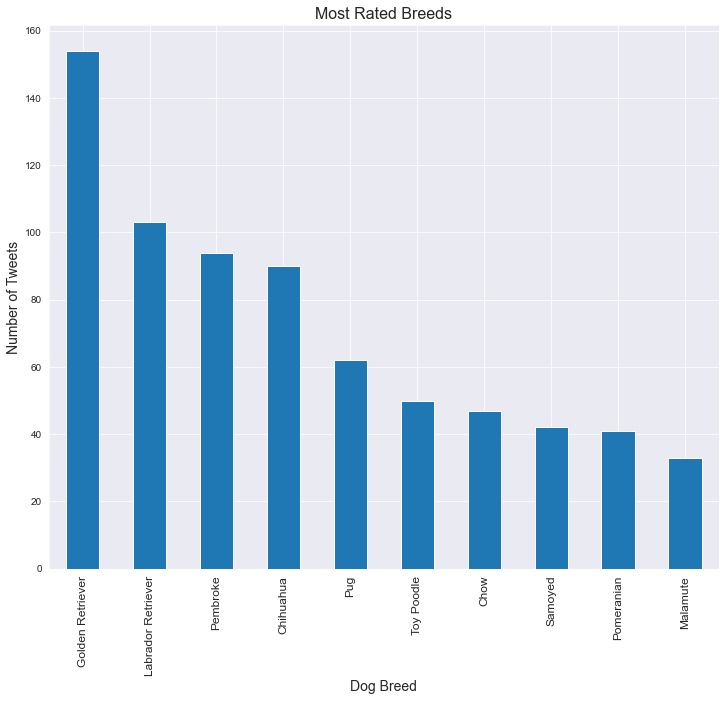

In [1185]:
rate_stats.nlargest(10, columns=['count']).plot.bar(y='count', figsize=(12,10), legend=None)
plt.title('Most Rated Breeds', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(fontsize=12)

#### What is the average rating for top 10 rated breeds?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Golden Retriever'),
  Text(1, 0, 'Labrador Retriever'),
  Text(2, 0, 'Pembroke'),
  Text(3, 0, 'Chihuahua'),
  Text(4, 0, 'Pug'),
  Text(5, 0, 'Toy Poodle'),
  Text(6, 0, 'Chow'),
  Text(7, 0, 'Samoyed'),
  Text(8, 0, 'Pomeranian'),
  Text(9, 0, 'Malamute')])

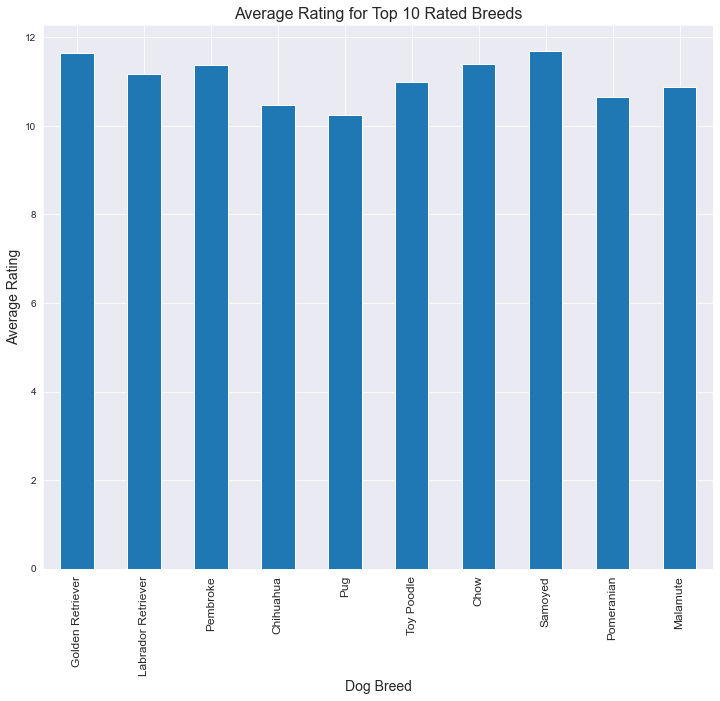

In [1187]:
rate_stats.nlargest(10, columns=['count']).plot.bar(y='mean', figsize=(12,10), legend=None)
plt.title('Average Rating for Top 10 Rated Breeds', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(fontsize=12) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Samoyed'),
  Text(1, 0, 'Golden Retriever'),
  Text(2, 0, 'Great Pyrenees'),
  Text(3, 0, 'Eskimo Dog'),
  Text(4, 0, 'Chow'),
  Text(5, 0, 'Pembroke'),
  Text(6, 0, 'Kelpie'),
  Text(7, 0, 'Cocker Spaniel'),
  Text(8, 0, 'Siberian Husky'),
  Text(9, 0, 'Bernese Mountain Dog')])

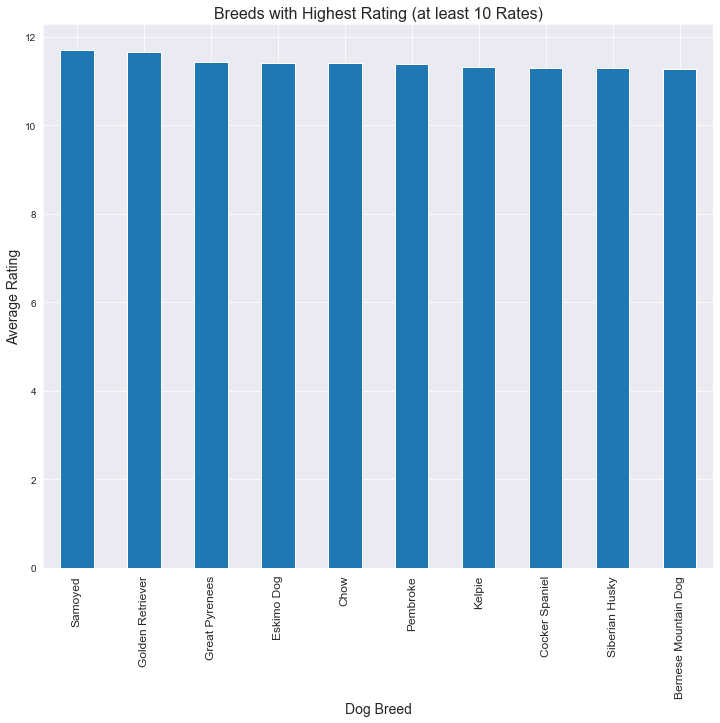

In [1191]:
rate_stats[rate_stats['count'] >= 10].nlargest(10, columns='mean').plot.bar(y='mean', figsize=(12,10), legend=None)
plt.title('Breeds with Highest Rating (at least 10 Rates)', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(fontsize=12)

#### What are the most retweeted dog breeds?

In [1194]:
retweet_sum = rating_df[rating_df.dog_breed != 'Unkown'].groupby(['dog_breed']).sum()['retweet_count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Golden Retriever'),
  Text(1, 0, 'Labrador Retriever'),
  Text(2, 0, 'Pembroke'),
  Text(3, 0, 'Chihuahua'),
  Text(4, 0, 'Samoyed'),
  Text(5, 0, 'French Bulldog'),
  Text(6, 0, 'Cocker Spaniel'),
  Text(7, 0, 'Chow'),
  Text(8, 0, 'Pomeranian'),
  Text(9, 0, 'Pug')])

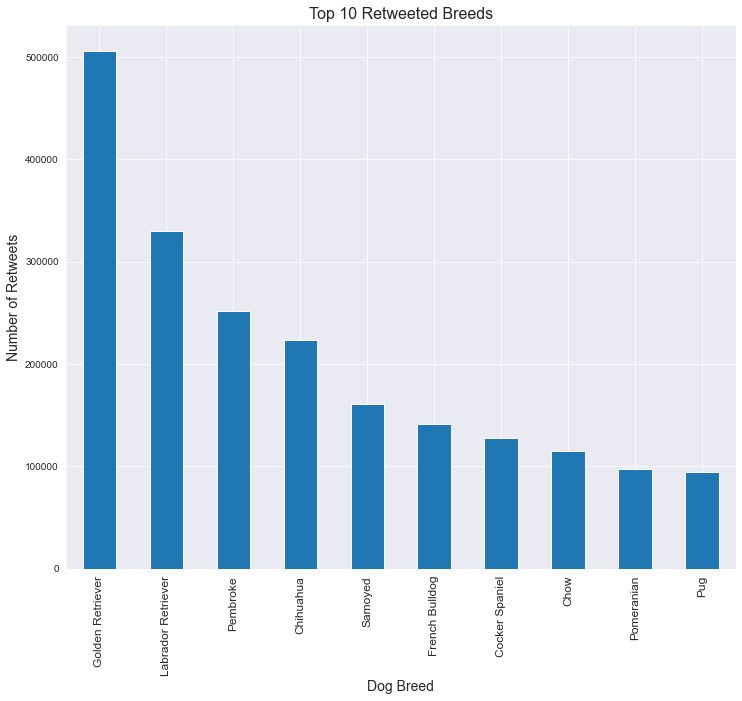

In [1199]:
retweet_sum.nlargest(10).plot.bar(figsize=(12,10))
plt.title('Top 10 Retweeted Breeds', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Number of Retweets', fontsize=14)
plt.xticks(fontsize=12)

In [1200]:
retweet_stats = rating_df[rating_df.dog_breed != 'Unkown'].groupby(['dog_breed']).describe()['retweet_count']

In [1202]:
retweet_stats

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan Hound,3.0,5136.000000,3834.429293,1632.0,3088.00,4544.0,6888.00,9232.0
Airedale,12.0,1204.416667,1145.325000,74.0,658.25,843.0,1219.75,4197.0
American Staffordshire Terrier,15.0,1780.866667,1151.119013,198.0,922.00,1444.0,3012.50,3560.0
Appenzeller,1.0,1819.000000,NaN,1819.0,1819.00,1819.0,1819.00,1819.0
Australian Terrier,1.0,4780.000000,NaN,4780.0,4780.00,4780.0,4780.00,4780.0
...,...,...,...,...,...,...,...,...
Welsh Springer Spaniel,4.0,948.000000,1007.748646,382.0,439.00,476.0,985.00,2458.0
West Highland White Terrier,15.0,1148.333333,1176.805826,50.0,565.00,787.0,1239.50,4260.0
Whippet,10.0,4811.000000,8953.021675,191.0,733.00,1888.0,4154.25,29867.0


#### What are the average number of retweets per breed?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'French Bulldog'),
  Text(1, 0, 'Whippet'),
  Text(2, 0, 'Standard Poodle'),
  Text(3, 0, 'English Springer'),
  Text(4, 0, 'Samoyed'),
  Text(5, 0, 'Cocker Spaniel'),
  Text(6, 0, 'Eskimo Dog'),
  Text(7, 0, 'Great Pyrenees'),
  Text(8, 0, 'Lakeland Terrier'),
  Text(9, 0, 'Golden Retriever')])

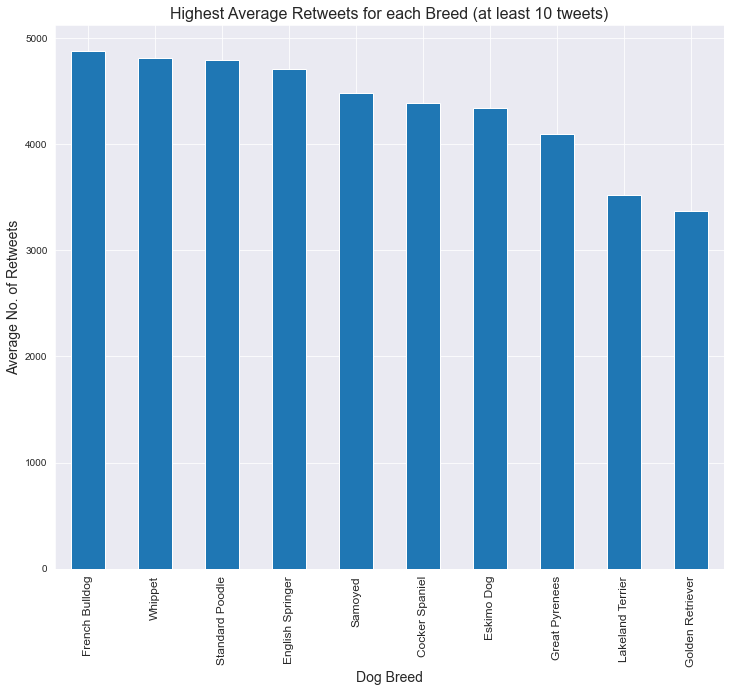

In [1220]:
retweet_stats[retweet_stats['count'] >= 10].nlargest(10, columns='mean').plot.bar(y='mean', figsize=(12,10), legend=None)
plt.title('Highest Average Retweets for each Breed (at least 10 tweets)', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Average No. of Retweets', fontsize=14)
plt.xticks(fontsize=12)

#### What are the most favorited breeds?

In [1210]:
favorite_sum = rating_df[rating_df.dog_breed != 'Unkown'].groupby(['dog_breed']).sum()['favorite_count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Golden Retriever'),
  Text(1, 0, 'Labrador Retriever'),
  Text(2, 0, 'Pembroke'),
  Text(3, 0, 'Chihuahua'),
  Text(4, 0, 'French Bulldog'),
  Text(5, 0, 'Samoyed'),
  Text(6, 0, 'Chow'),
  Text(7, 0, 'Cocker Spaniel'),
  Text(8, 0, 'Pug'),
  Text(9, 0, 'Malamute')])

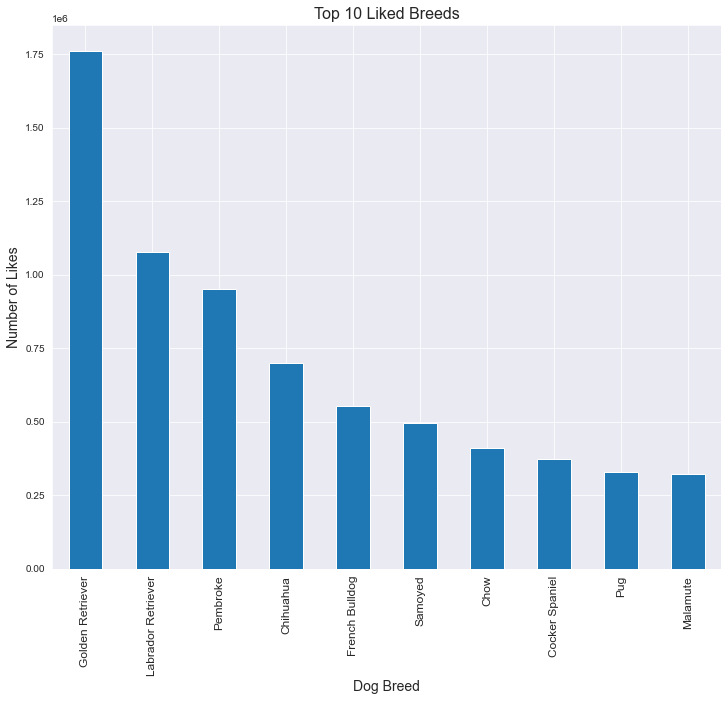

In [1212]:
favorite_sum.nlargest(10).plot.bar(figsize=(12,10))
plt.title('Top 10 Liked Breeds', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Number of Likes', fontsize=14)
plt.xticks(fontsize=12)

#### What are the average favorite per breed?

In [1213]:
favorite_stats = rating_df[rating_df.dog_breed != 'Unkown'].groupby(['dog_breed']).describe()['favorite_count']

In [1214]:
favorite_stats

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan Hound,3.0,15599.666667,9222.098966,6353.0,11001.00,15649.0,20223.0,24797.0
Airedale,12.0,4767.416667,5703.095323,200.0,1332.75,2720.0,5076.0,20074.0
American Staffordshire Terrier,15.0,7631.933333,6735.823446,429.0,2788.50,5337.0,11011.0,22217.0
Appenzeller,1.0,10927.000000,NaN,10927.0,10927.00,10927.0,10927.0,10927.0
Australian Terrier,1.0,18165.000000,NaN,18165.0,18165.00,18165.0,18165.0,18165.0
...,...,...,...,...,...,...,...,...
Welsh Springer Spaniel,4.0,4579.250000,4354.462720,1266.0,2103.75,3059.0,5534.5,10933.0
West Highland White Terrier,15.0,5046.533333,7228.977381,220.0,1155.50,2284.0,3767.5,23740.0
Whippet,10.0,14475.500000,22160.269524,536.0,2675.00,6393.0,15688.5,73913.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'French Bulldog'),
  Text(1, 0, 'Whippet'),
  Text(2, 0, 'Samoyed'),
  Text(3, 0, 'Cocker Spaniel'),
  Text(4, 0, 'English Springer'),
  Text(5, 0, 'Standard Poodle'),
  Text(6, 0, 'Eskimo Dog'),
  Text(7, 0, 'Great Pyrenees'),
  Text(8, 0, 'Golden Retriever'),
  Text(9, 0, 'Cardigan')])

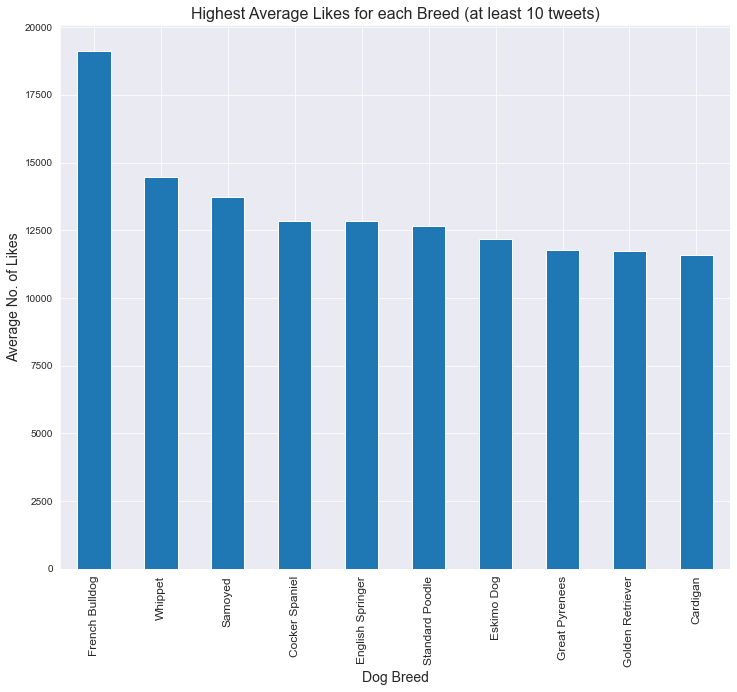

In [1222]:
favorite_stats[favorite_stats['count'] >= 10].nlargest(10, columns='mean').plot.bar(y='mean', figsize=(12,10), legend=None)
plt.title('Highest Average Likes for each Breed (at least 10 tweets)', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Average No. of Likes', fontsize=14)
plt.xticks(fontsize=12)